# Machine Learning I Homework

### 1. (Fake) Titanic Data Classification.

The file 'titanicMachLearn.csv' contains (fake) data showing an SES (socioeconomic status) measure, fare paid for the ticket, and whether the person survived or not.

**1a.** Do a k=3 nearest neighbor classification on the data using an 80/20 training/test split. Summarize the performance of the classifier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression              # for simulating data
from sklearn.model_selection import train_test_split      # splitting training and test data
from sklearn.linear_model import LinearRegression         # making the linear predictor model
from sklearn.metrics import mean_squared_error, r2_score  # compute some diagnostics
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris

In [2]:
titanic = pd.read_csv('/Users/shannoningram/house/Livingroom/FDS-CourseTwo/Data/titanicMachLearn.csv')
titanic

,SES,Fare,Survived
0,39,15,0
1,83,33,1
2,98,25,1
3,67,33,1
4,36,14,0
...,...,...,...
886,4,11,0
887,54,33,1
888,25,11,0
889,52,32,1


The shapes of the x and y variables:  (891, 2) (891,)

Scatter plot


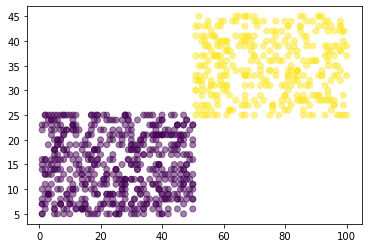

In [3]:

#Convert titanic to data frame and split x and y
titanic_df = pd.DataFrame(titanic)
x = titanic[['SES', 'Fare']].to_numpy()

y = titanic['Survived'].to_numpy()


print("The shapes of the x and y variables: ",x.shape,y.shape)
print()
print("Scatter plot")
plt.scatter(x[:,0], x[:,1], c=y, alpha =.5)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

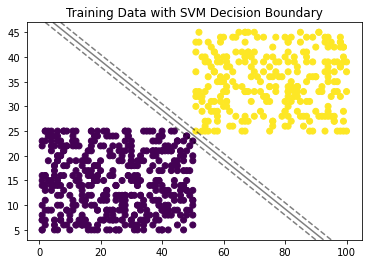

In [4]:
svm = SVC(kernel='linear', C=1)
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

# Scatter plot of the test data showing the decision boundary
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis')

# Create the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
XY = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(XY).reshape(XX.shape)

# Plot the decision boundary
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
           alpha=0.5, linestyles=['--', '-', '--'])

plt.title("Training Data with SVM Decision Boundary")
plt.show()

In [5]:
acc_score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
cls_report = classification_report(y_test, y_pred)
print(acc_score)
print("________")
print(conf_matrix)
print("________")
print(cls_report)

1.0
________
[[105   0]
 [  0  74]]
________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [6]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)


In [ ]:

def machine(a,b):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=42)
    print("Train shape  Test Shape  Regular")
    print(X_train.shape,"", X_test.shape, "", X.shape)
    print(y_train.shape,"", y_test.shape, "", y.shape)
    model = LinearRegression() # too easy!
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    cls_report = classification_report(y_test, y_pred)
    print(f"Accuracy Score: {acc_score:.2f}%")
    print(conf_matrix)
    print(cls_report)

**1b.** Make a scatter plot of the data with color showing the survival status. Does the plot intuitivly agree with the performance of your classifier?

### 2. Iris Data Classification.

Do a nearest neighbors classification on the iris data using the 2 variables you think would work best based on the pair-pair plot we did in class (i.e. don't use the exact same variables we used in the in-class tutorial).

Compare the results with the results we got in class using the first two variables.